<a href="https://colab.research.google.com/github/PauloBochnia/Projeto_2_Bootcamp/blob/main/Paulo_Vinicius_Nichele_Bochnia_Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação

Notebook do Paulo Vinicius N. Bochnia

Linkedin: https://www.linkedin.com/in/paulobochnia/

Administrador, Pós Graduando em Big Data/ Inteligência Artificial e Business Intelligence.

Analista de Business Intelligence e aspirante a Data Scientist.

# Resumo

Este estudo abordará o vírus Febre Amarela, verificando a cobertura vacinal histórica que temos para combater este problema, as mortes causadas e o número de pessoas contaminadas por ele. A intenção deste estudo é verificar qual é a Região com expressivos picos de óbitos e contaminação, para na sequência investigar a causa destes fatores.

# Análise dos Dados

Para analisarmos os nossos dados, o estudo é divido em 5 partes, que são: Limpeza/Importação dos dados; Análise de Dados; Hipóteses; Validação das Hipóteses; e Conclusão. 

## 1. Limpeza/Importação dos Dados

Capitulo de ETL (extract, transform and load) para organizar os DataFrames que utilizaremos ao longo do estudo. Os bancos de dados são:

• 	Cobertura Vacinal de 1994 a 2020 (nível estado e município). fonte - http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def - Quantidade de pessoas < 1 ano (público alvo da ação) por quantidade de pessoas vacinadas *100.

• 	Doses Calculos Cobertura Vacinal de 1994 A 2020 (nível estado e município). fonte - http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def

• 	Área dos municipios brasileiros 2019 (intitulada como "area_mun"). fonte - https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15761-areas-dos-municipios.html?=&t=downloads

• 	Óbitos por local de residência do ano de 1996 a 2018 (nível estado e município). fonte - http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/evitb10uf.def - Somente com pessoas de 5 a 74 anos de idade - Categoria CID 10 = Febre Amarela.

• 	Óbitos por local de residência do ano de 2017 a 2018 (Região Sudeste). fonte - http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/evitb10uf.def - Somente com pessoas de 5 a 74 anos de idade - Categoria CID 10 = Febre Amarela.

• 	Casos confirmados 1º Sintoma de 2001 a 2016 (nivel estado e município). fonte - http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=29878153

• 	Casos confirmados 1º Sintoma por faixa etária (somente dos estados de São Paulo e Minas Gerais). fonte - http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=29878153

## 1.1 Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import copy
import seaborn as sns
from datetime import date

## 1.2 Importação e Transformação dos Dados

Importação/Tratamento dos bancos e denominação das variáveis.

### 1.2.1 Cobertura Vacinal

In [ ]:
#Extração da base
cobertura_vacinal_estado = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/cpnibr16072022433.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',')
cobertura_vacinal_municipio = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/cpnibr16072024754.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',')

### 1.2.2 Doses Calculos Cobertura Vacinal

In [ ]:
#Extração da base
dc_cobertura_vacinal_estado = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/cpnibr16072023899.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',')
dc_cobertura_vacinal_municipio = pd.read_excel('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/cpnibr16072024794.xlsx?raw=true', skiprows = 4, skipfooter = 3)

### 1.2.3 Área dos Municípios Brasileiros

In [ ]:
#Extração da base
area_mun = pd.read_excel('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/AR_BR_RG_UF_RGINT_RGIM_MES_MIC_MUN_2019.xls?raw=true',skipfooter = 3)
cod_ibge = []
for i in area_mun['CD_GCMUN']:
    i = str(i)
    cod_ibge.append(float(i[:6]))
area_mun['cod_ibge'] = cod_ibge
regioes = {1:'Norte',2:'Nordeste',3:'Sudeste',4:'Sul',5:'Centro-oeste'}
area_mun['regiao'] = 0
area_mun['regiao'] = area_mun['CD_GCUF'].map(lambda i: regioes[int(str(i)[0])])

### 1.2.4 Óbitos por Local de Residência

In [ ]:
#Extração da base
obitos_estado = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A114457189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 4, skipfooter = 9, engine ='python',na_values='-')
obitos_municipio = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A114722189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 4, skipfooter = 9, engine ='python',na_values='-')

### 1.2.5 Primeiro Sintoma

In [ ]:
#Extração da base
primeirosintoma_estado_antes_2007 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A183315189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 3, skipfooter = 14, engine ='python',na_values='-')
primeirosintoma_estado_depois_2007 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A120046189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 3, skipfooter = 14, engine ='python',na_values='-')
primeirosintoma_estado = pd.concat([primeirosintoma_estado_depois_2007,primeirosintoma_estado_antes_2007])
primeirosintoma_estado.fillna(0)
primeirosintoma_estado = primeirosintoma_estado.groupby('UF de residência').sum()
primeirosintoma_estado.drop(columns = 'Total', inplace = True)
lista_de_anos = [date(int(i),1,1) for i in primeirosintoma_estado.T.index]
primeirosintoma_estado = primeirosintoma_estado.T
primeirosintoma_estado.index = lista_de_anos
primeirosintoma_municipio_antes_2007 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A183357189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 3, skipfooter = 14, engine ='python',na_values='-')
primeirosintoma_municipio_depois_2007 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A183005189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 3, skipfooter = 14, engine ='python',na_values='-')
primeirosintoma_municipio = pd.concat([primeirosintoma_municipio_depois_2007,primeirosintoma_municipio_antes_2007])
primeirosintoma_municipio.fillna(0)
primeirosintoma_municipio = primeirosintoma_municipio.groupby('Município de residência').sum()

### 1.2.6 Óbitos Detalhados por Faixa Etária

In [ ]:
#Extração da base
obitos_faixa_etaria_2018 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A205202189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 5, skipfooter = 9, engine ='python',na_values='-')
obitos_faixa_etaria_2017 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A205241189_28_143_208.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 5, skipfooter = 9, engine ='python',na_values='-')

### 1.2.7 Primeiro Sintoma por Faixa Etária

In [ ]:
primeiro_sintoma_faixa_etaria_2016 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A214949189_28_143_2082016.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 4, skipfooter = 13, engine ='python',na_values='-')
primeiro_sintoma_faixa_etaria_2009 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A215054189_28_143_2082009.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 4, skipfooter = 13, engine ='python',na_values='-')
primeiro_sintoma_faixa_etaria_2003 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A215213189_28_143_2082003.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 4, skipfooter = 14, engine ='python',na_values='-')
primeiro_sintoma_faixa_etaria_2001 = pd.read_csv('https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/A215229189_28_143_2082001.csv?raw=true', encoding = 'ISO-8859-1', sep =';', decimal =',', skiprows = 4, skipfooter = 14, engine ='python',na_values='-')

## 2. Análise de Dados

A análise consistirá em dois pontos:

• 	A Febre Amarela no Brasil, um texto direcionado para resumir e levantar alguns aspectos da doença no Brasil.

• 	Análise das bases de dados para verificarmos pontos de partidas para a construção de análises de áreas alvos do nosso estudo.

A partir desses pontos criaremos as hipóteses para testarmos nos municipios alvos.

### 2.1 A Febre Amarela no Brasil

A Febre Amarela ("Flavivirus febricis") é o vírus transmitido por certas espécies de mosquitos. Este vírus ataca primeiro o fígado, causando a febre, dores de cabeças e a pele amarelada. O site policlinica de botafogo indicou que as taxas de mortalidade da doença varia conforme o histórico de surtos apresentados no Brasil, por exemplo, no surto de 2017 a taxa chegou em 30%.

Apesar de ser uma doença mortal para nossa sociedade, já temos desenvolvida e distribuida em nossos postos de saúde a vacina para o combate desta enfermidade. No manual de vigilância da febre amarela feito pela Secretaria de Vigilância de Saúde (SVS), a classificação do quadro clinico é:

<img src='https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/aspectos_da_febre_amarela.PNG?raw=1' width=70%>

Outro fato curioso nesse manual apresentado - lembrando que ele foi feito em 2003 - são as classificações de áreas de riscos no país:

<img src='https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/areas_de_risco.PNG?raw=1' width=70%>

• 	Enzoótica ou endêmica : Área onde o vírus circula entre os hospedeiros naturais (principalmente macacos) e está presente na população culicidiana vetora. Abrange os estados das regiões Norte, Centro-Oeste e o estado do Maranhão.

• 	Epizoótica ou de Transição : Área onde o vírus circulava entre os hospedeiros naturais (principalmente macacos), mas foi alterado de acordo com o desmatamento. Abrange a área centro-sul do Piauí, oeste da Bahia, noroeste de Minas Gerais, São Paulo e Paraná, oeste de Santa Catarina e noroeste do Rio Grande do Sul.

• 	Indene de risco potencial : Áreas que tiveram presença recente do vírus e apresentam maior risco para circulação do mesmo. Fazem parte desta área: centro-norte do Espírito Santo, sul da Bahia e o sul de Minas Gerais.

• 	Indene : Corresponde a área que não há a circulação do vírus amarílico. 

A história e ordem cronológica da Febre Amarela é vaga, de acordo com o livro "História da Febre Amarela no Brasil" do Doutor Odari Franco, suspeita-se que primeiro caso de Febre Amarela no Brasil foi do návio, da frota de Gomes de Andrade, que partiu das ilhas de Cabo Verde com destino ao Maranhão em 1685, a segunda parada deste navio foi em Recife, onde, por documentos históricos da época, foi relatado que havia uma epidemia na cidade.

Ao decorrrer do tempo é apresentado alguns picos em alguns anos, veja os gráficos que compõe o estudo da SVS:

<img src='https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/dados_hist_1.png?raw=1' width=70%>

<img src='https://github.com/PauloBochnia/Projeto_2_Bootcamp/blob/main/dados_hist_2.png?raw=1' width=70%>

### 2.2 Análise das Bases de Dados

Para nos ajudar no levantamento de hipóteses, vou verificar primeiro a base de primeiros sintomas da doença, analisando por região e verificando em qual temos mais problemas.

In [ ]:
primeirosintoma_estado_dois = primeirosintoma_estado.reset_index().melt(id_vars=['index'], value_vars = primeirosintoma_estado.columns)
primeirosintoma_estado_dois.columns = ['dia_mes_ano','uf','nº pessoas']
primeirosintoma_estado_dois['dia_mes_ano'] = primeirosintoma_estado_dois['dia_mes_ano'].astype('datetime64')
primeirosintoma_estado_dois['codigo_uf'] = primeirosintoma_estado_dois['uf'].str[:1]
primeirosintoma_estado_dois['regiao'] = 0
primeirosintoma_estado_dois['regiao'] = primeirosintoma_estado_dois['codigo_uf'].map(lambda i: regioes[int(i)])
primeirosintoma_estado_dois['ano'] = primeirosintoma_estado_dois['dia_mes_ano'].map(lambda i: i.year)
primeirosintoma_estado_dois.head()

,dia_mes_ano,uf,nº pessoas,codigo_uf,regiao,ano
0,2006-01-01,11 Rondônia,0.0,1,Norte,2006
1,2007-01-01,11 Rondônia,0.0,1,Norte,2007
2,2008-01-01,11 Rondônia,0.0,1,Norte,2008
3,2009-01-01,11 Rondônia,0.0,1,Norte,2009
4,2010-01-01,11 Rondônia,0.0,1,Norte,2010


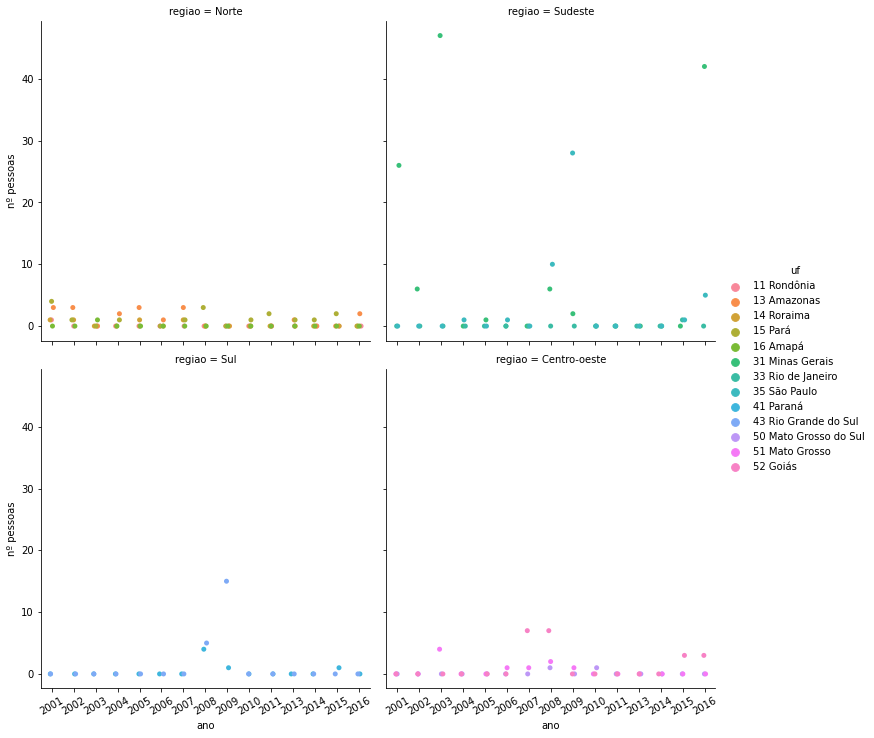

In [ ]:
ax = sns.catplot(data = primeirosintoma_estado_dois, x = 'ano', y = 'nº pessoas', hue = 'uf', col = 'regiao', col_wrap =2)
ax.set_xticklabels(rotation=30)

Ao analisarmos os primeiros sintomas da Febre Amarela, notamos que a Região Sudeste é a que apresenta maior pico histórico de 2001 a 2016, portanto vou concentrar as análises deste estudo nessa área.

In [ ]:
primeirosintoma_estado_dois_regiao_sudeste = primeirosintoma_estado_dois[primeirosintoma_estado_dois['regiao'] == 'Sudeste']
primeirosintoma_estado_dois_regiao_sudeste.head()

,dia_mes_ano,uf,nº pessoas,codigo_uf,regiao,ano
75,2006-01-01,31 Minas Gerais,0.0,3,Sudeste,2006
76,2007-01-01,31 Minas Gerais,0.0,3,Sudeste,2007
77,2008-01-01,31 Minas Gerais,6.0,3,Sudeste,2008
78,2009-01-01,31 Minas Gerais,2.0,3,Sudeste,2009
79,2010-01-01,31 Minas Gerais,0.0,3,Sudeste,2010


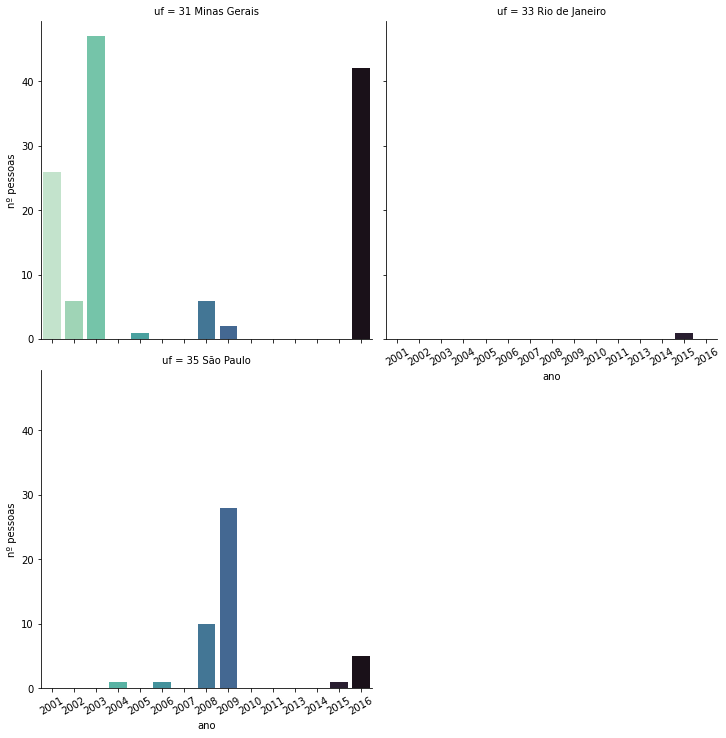

In [ ]:
ax = sns.catplot(data = primeirosintoma_estado_dois_regiao_sudeste, x = 'ano', y = 'nº pessoas', kind = 'bar', col = 'uf', col_wrap =2, palette = sns.color_palette('mako_r', 15))
ax.set_xticklabels(rotation=30)

Ao analisarmos a região sudeste percebemos que os estados mais preocupantes são São Paulo e Minas Gerais, estes serão os estados alvos das minhas análises.

Apenas para verificar se não há algum outro pico fora do tempo da base de primeiro sintoma que extraimos do TABNET, vou analisar também a base de óbitos, para verificarmos se há alguma outra região com problemas em número de fatalidades por culpa da doença.

In [ ]:
lista = ['1996', '1997', '1998', '1999', '2000', '2001',
       '2003', '2005', '2007', '2008', '2009', '2011', '2012', '2013', '2015',
       '2016', '2017', '2018']
obitos_estado_dois = obitos_estado.melt(id_vars=['Unidade da Federação'], value_vars = lista)
obitos_estado_dois.columns = ['uf','dia_mes_ano','nº óbitos']
obitos_estado_dois['dia_mes_ano'] = obitos_estado_dois['dia_mes_ano'].astype('datetime64')
obitos_estado_dois['codigo_uf'] = obitos_estado_dois['uf'].str[:1]
obitos_estado_dois['regiao'] = 0
obitos_estado_dois['regiao'] = obitos_estado_dois['codigo_uf'].map(lambda i: regioes[int(i)])
obitos_estado_dois['ano'] = obitos_estado_dois['dia_mes_ano'].map(lambda i: i.year)
obitos_estado_dois.head()

,uf,dia_mes_ano,nº óbitos,codigo_uf,regiao,ano
0,11 Rondônia,1996-01-01,NaN,1,Norte,1996
1,12 Acre,1996-01-01,NaN,1,Norte,1996
2,13 Amazonas,1996-01-01,5.0,1,Norte,1996
3,14 Roraima,1996-01-01,NaN,1,Norte,1996
4,15 Pará,1996-01-01,NaN,1,Norte,1996


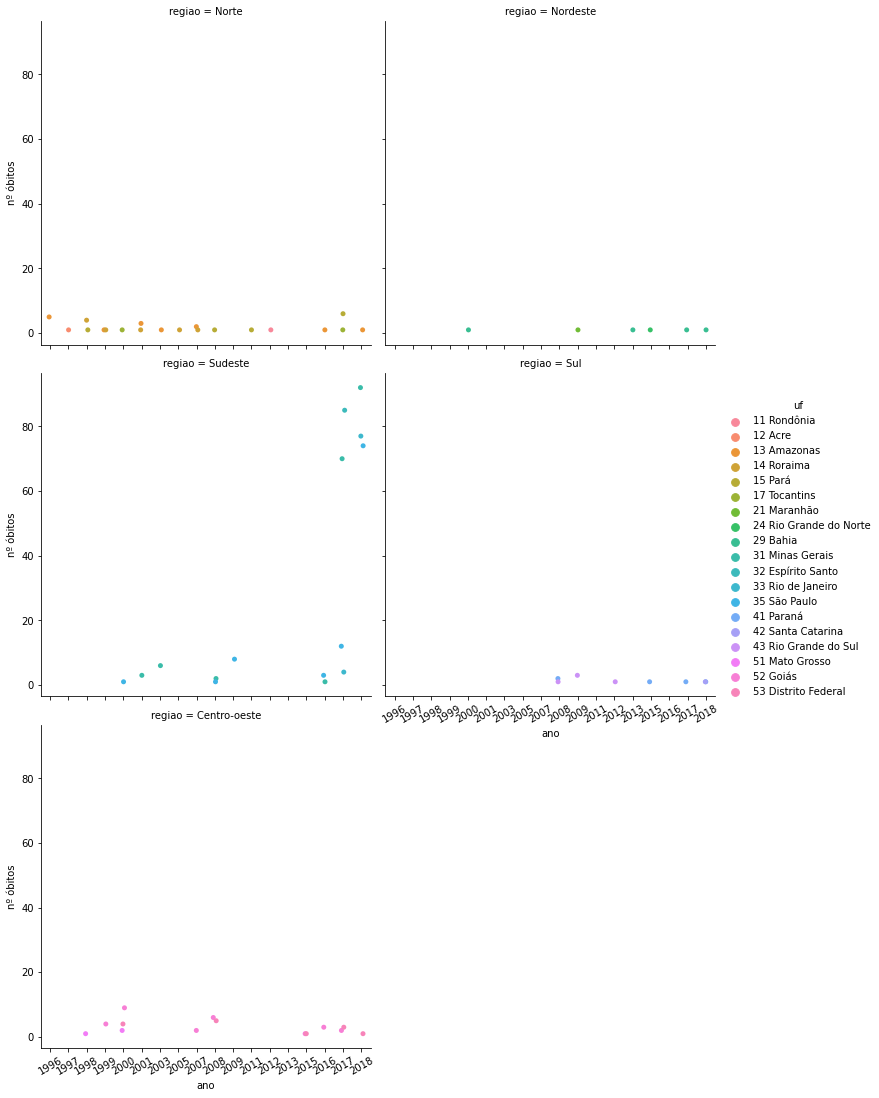

In [ ]:
ax = sns.catplot(data = obitos_estado_dois, x = 'ano', y = 'nº óbitos', hue = 'uf', col = 'regiao', col_wrap =2)
ax.set_xticklabels(rotation=30)

Em mais uma análise temos que a região Sudeste é de fato a mais preocupante ao analisarmos a quantidade de óbitos. Vamos verificar se São Paulo e Minas Gerais se destacarão neste indicador também:

In [ ]:
obitos_estado_dois_regiao_sudeste = obitos_estado_dois[obitos_estado_dois['regiao'] == 'Sudeste']
obitos_estado_dois_regiao_sudeste.head()

,uf,dia_mes_ano,nº óbitos,codigo_uf,regiao,ano
9,31 Minas Gerais,1996-01-01,NaN,3,Sudeste,1996
10,32 Espírito Santo,1996-01-01,NaN,3,Sudeste,1996
11,33 Rio de Janeiro,1996-01-01,NaN,3,Sudeste,1996
12,35 São Paulo,1996-01-01,NaN,3,Sudeste,1996
28,31 Minas Gerais,1997-01-01,NaN,3,Sudeste,1997


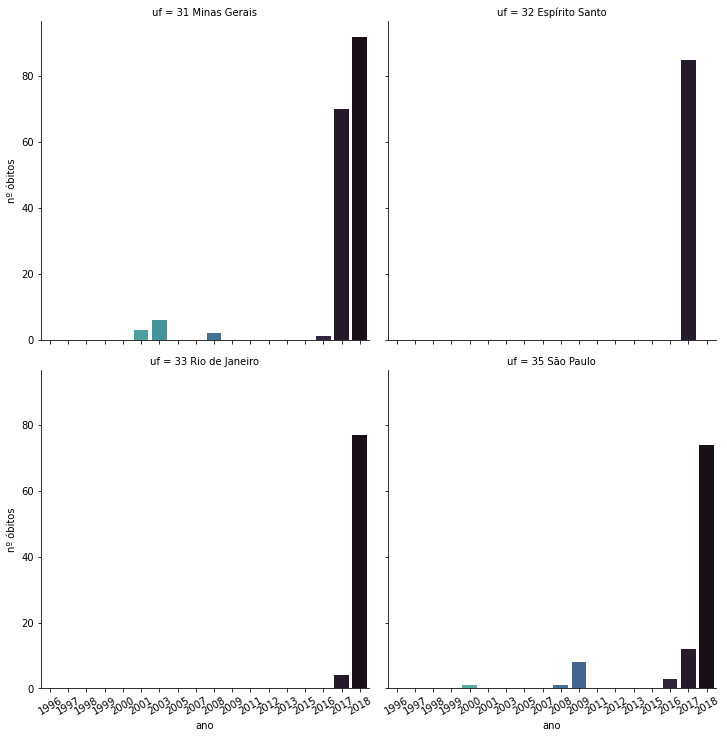

In [ ]:
ax = sns.catplot(data = obitos_estado_dois_regiao_sudeste, x = 'ano', y = 'nº óbitos', kind = 'bar', col = 'uf', col_wrap =2, palette = sns.color_palette('mako_r', 18))
ax.set_xticklabels(rotation=30)

Nos anos de 2017 e 2018 percebemos um aumento MUITO expressivo das mortes em todos os estados da região.

## 3. Hipóteses

Com a análise feita, e os pontos críticos evidenciados em gráficos, eu vou validar neste trabalho as seguintes hipóteses:

• 	A falta de cobertura da vacina tem algo relacionado com a quantidade de mortes em 2017 e 2018 na região sudeste.

• 	A falta de cobertura da vacina tem algo relacionado com o alto indice de contaminação dos estados de São Paulo/Minas Gerais.

## 4. Validação das Hipóteses

### 4.1 Validação da Primeira Hipótese

In [ ]:
lista_de_estados_hipotese_1 = ['31 Minas Gerais','32 Espírito Santo','33 Rio de Janeiro',
                               '35 São Paulo']
cobertura_vacinal_estados_hipotese_1 = cobertura_vacinal_estado[cobertura_vacinal_estado['Unidade da Federação'].isin(lista_de_estados_hipotese_1)]
cobertura_vacinal_estados_hipotese_1

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
16,31 Minas Gerais,0.0,0.00,0.00,0.29,14.57,56.51,46.58,83.62,68.62,20.26,86.37,101.79,102.50,102.77,96.49,103.28,95.69,99.51,97.85,99.90,85.33,91.00,86.03,81.76,94.19,85.71,64.89,75.31
17,32 Espírito Santo,0.0,0.02,0.00,2.32,0.03,0.06,45.99,21.89,4.13,5.97,26.66,34.60,36.40,35.94,33.54,10.73,1.03,0.66,0.80,0.56,0.44,0.39,0.42,61.95,73.87,70.89,51.94,19.38
18,33 Rio de Janeiro,0.0,0.00,0.08,0.06,0.03,0.25,5.30,1.69,0.38,0.47,0.32,0.34,0.22,0.32,0.75,0.44,0.36,0.33,0.39,1.04,1.01,0.51,0.22,26.44,49.26,55.21,32.51,6.79
19,35 São Paulo,0.0,0.00,0.00,0.00,5.25,11.98,8.55,7.36,8.70,10.08,10.17,10.50,11.50,11.82,13.43,17.18,19.21,20.45,20.45,20.45,19.56,19.70,18.63,24.09,60.18,72.30,54.95,18.13


In [ ]:
lista = ['1994','1995','1996', '1997', '1998', '1999', '2000', '2001',
       '2003', '2005', '2007', '2008', '2009', '2011', '2012', '2013', '2015',
       '2016', '2017', '2018','2019','2020']
cobertura_vacinal_estados_hipotese_1 = cobertura_vacinal_estados_hipotese_1.melt(id_vars=['Unidade da Federação'], value_vars = lista)
cobertura_vacinal_estados_hipotese_1.columns = ['uf','dia_mes_ano','cobertura_vacinal']
cobertura_vacinal_estados_hipotese_1['dia_mes_ano'] = cobertura_vacinal_estados_hipotese_1['dia_mes_ano'].astype('datetime64')
cobertura_vacinal_estados_hipotese_1['codigo_uf'] = cobertura_vacinal_estados_hipotese_1['uf'].str[:1]
cobertura_vacinal_estados_hipotese_1['regiao'] = 0
cobertura_vacinal_estados_hipotese_1['regiao'] = cobertura_vacinal_estados_hipotese_1['codigo_uf'].map(lambda i: regioes[int(i)])
cobertura_vacinal_estados_hipotese_1['ano'] = cobertura_vacinal_estados_hipotese_1['dia_mes_ano'].map(lambda i: i.year)
cobertura_vacinal_estados_hipotese_1.head()

,uf,dia_mes_ano,cobertura_vacinal,codigo_uf,regiao,ano
0,31 Minas Gerais,1994-01-01,0.0,3,Sudeste,1994
1,32 Espírito Santo,1994-01-01,0.0,3,Sudeste,1994
2,33 Rio de Janeiro,1994-01-01,0.0,3,Sudeste,1994
3,35 São Paulo,1994-01-01,0.0,3,Sudeste,1994
4,31 Minas Gerais,1995-01-01,0.0,3,Sudeste,1995


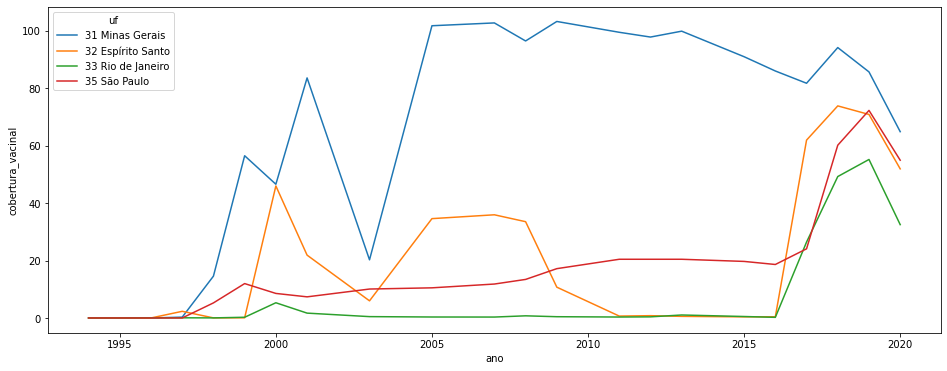

In [ ]:
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = cobertura_vacinal_estados_hipotese_1, x = 'ano', y = 'cobertura_vacinal',hue = 'uf')

In [ ]:
lista = ['MG','RJ','SP']
obitos_faixa_etaria_2018_hipotese_1 = obitos_faixa_etaria_2018.melt(id_vars=['Faixa Etária detalhada'], value_vars = lista)
obitos_faixa_etaria_2018_hipotese_1.columns = ['faixa_etaria','uf','nº_obitos']
obitos_faixa_etaria_2017_hipotese_1 = obitos_faixa_etaria_2017.melt(id_vars=['Faixa Etária detalhada'], value_vars = lista)
obitos_faixa_etaria_2017_hipotese_1.columns = ['faixa_etaria','uf','nº_obitos']

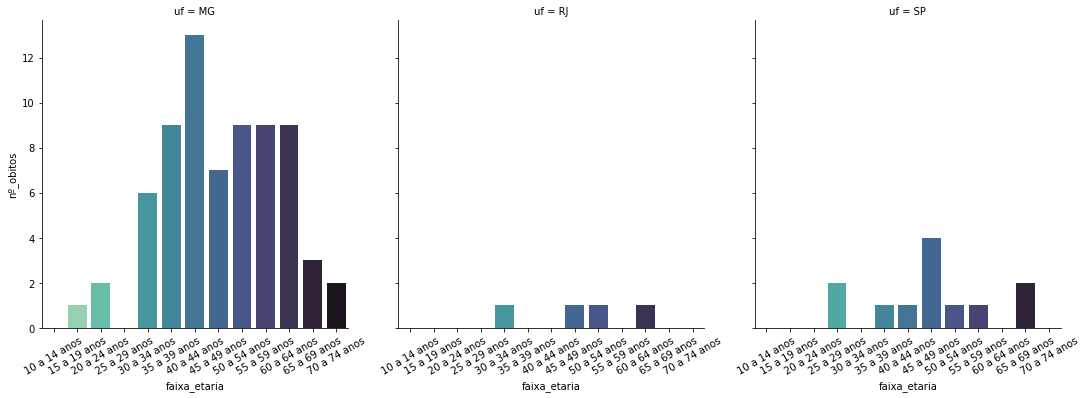

In [ ]:
ax = sns.catplot(data = obitos_faixa_etaria_2017_hipotese_1, x = 'faixa_etaria', y = 'nº_obitos', kind = 'bar', col = 'uf', palette = sns.color_palette('mako_r', 13))
ax.set_xticklabels(rotation=30)

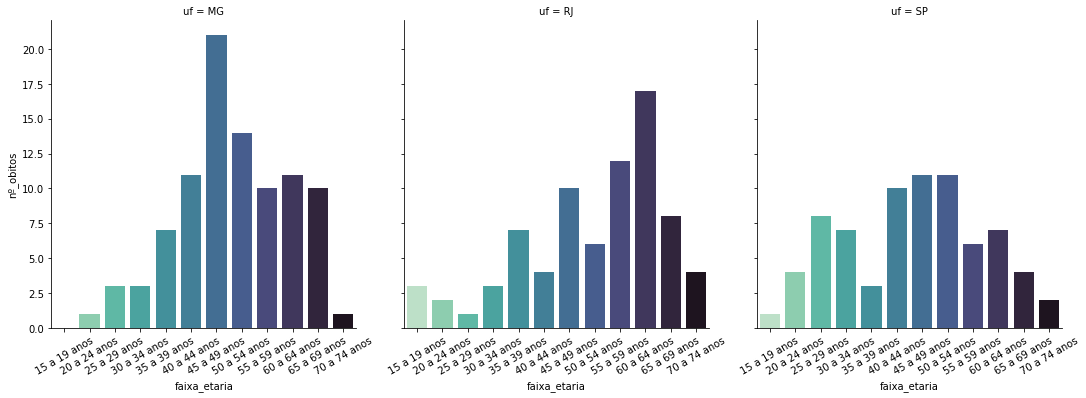

In [ ]:
bx = sns.catplot(data = obitos_faixa_etaria_2018_hipotese_1, x = 'faixa_etaria', y = 'nº_obitos', kind = 'bar', col = 'uf', palette = sns.color_palette('mako_r', 12))
bx.set_xticklabels(rotation=30)

### 4.1 Validação da Segunda Hipótese

In [ ]:
lista_de_estados_hipotese_2 = ['31 Minas Gerais','35 São Paulo']
cobertura_vacinal_estados_hipotese_2 = cobertura_vacinal_estado[cobertura_vacinal_estado['Unidade da Federação'].isin(lista_de_estados_hipotese_2)]
cobertura_vacinal_estados_hipotese_2

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
16,31 Minas Gerais,0.0,0.0,0.0,0.29,14.57,56.51,46.58,83.62,68.62,20.26,86.37,101.79,102.5,102.77,96.49,103.28,95.69,99.51,97.85,99.90,85.33,91.0,86.03,81.76,94.19,85.71,64.89,75.31
19,35 São Paulo,0.0,0.0,0.0,0.00,5.25,11.98,8.55,7.36,8.70,10.08,10.17,10.50,11.5,11.82,13.43,17.18,19.21,20.45,20.45,20.45,19.56,19.7,18.63,24.09,60.18,72.30,54.95,18.13


In [ ]:
lista = ['1994','1995','1996', '1997', '1998', '1999', '2000', '2001',
       '2003', '2005', '2007', '2008', '2009', '2011', '2012', '2013', '2015',
       '2016', '2017', '2018','2019','2020']
cobertura_vacinal_estados_hipotese_2 = cobertura_vacinal_estados_hipotese_2.melt(id_vars=['Unidade da Federação'], value_vars = lista)
cobertura_vacinal_estados_hipotese_2.columns = ['uf','dia_mes_ano','cobertura_vacinal']
cobertura_vacinal_estados_hipotese_2['dia_mes_ano'] = cobertura_vacinal_estados_hipotese_2['dia_mes_ano'].astype('datetime64')
cobertura_vacinal_estados_hipotese_2['codigo_uf'] = cobertura_vacinal_estados_hipotese_2['uf'].str[:1]
cobertura_vacinal_estados_hipotese_2['regiao'] = 0
cobertura_vacinal_estados_hipotese_2['regiao'] = cobertura_vacinal_estados_hipotese_2['codigo_uf'].map(lambda i: regioes[int(i)])
cobertura_vacinal_estados_hipotese_2['ano'] = cobertura_vacinal_estados_hipotese_2['dia_mes_ano'].map(lambda i: i.year)
cobertura_vacinal_estados_hipotese_2.head()

,uf,dia_mes_ano,cobertura_vacinal,codigo_uf,regiao,ano
0,31 Minas Gerais,1994-01-01,0.0,3,Sudeste,1994
1,35 São Paulo,1994-01-01,0.0,3,Sudeste,1994
2,31 Minas Gerais,1995-01-01,0.0,3,Sudeste,1995
3,35 São Paulo,1995-01-01,0.0,3,Sudeste,1995
4,31 Minas Gerais,1996-01-01,0.0,3,Sudeste,1996


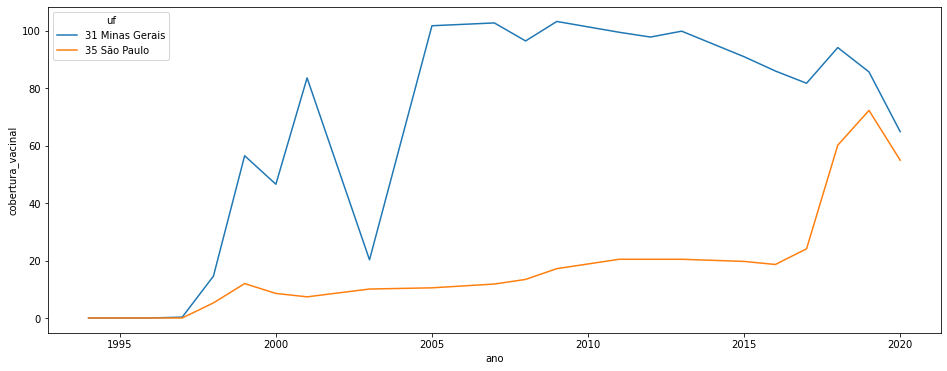

In [ ]:
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = cobertura_vacinal_estados_hipotese_2, x = 'ano', y = 'cobertura_vacinal',hue = 'uf')

In [ ]:
lista = ['MG','SP']
primeiro_sintoma_faixa_etaria_2001_hipotese_2 = primeiro_sintoma_faixa_etaria_2001.melt(id_vars=['Faixa Etária'], value_vars = 'MG')
primeiro_sintoma_faixa_etaria_2001_hipotese_2.columns = ['faixa_etaria','uf','nº_casos']
primeiro_sintoma_faixa_etaria_2003_hipotese_2 = primeiro_sintoma_faixa_etaria_2003.melt(id_vars=['Faixa Etária'], value_vars = 'MG')
primeiro_sintoma_faixa_etaria_2003_hipotese_2.columns = ['faixa_etaria','uf','nº_casos']
primeiro_sintoma_faixa_etaria_2009_hipotese_2 = primeiro_sintoma_faixa_etaria_2009.melt(id_vars=['Faixa Etária'], value_vars = lista)
primeiro_sintoma_faixa_etaria_2009_hipotese_2.columns = ['faixa_etaria','uf','nº_casos']
primeiro_sintoma_faixa_etaria_2016_hipotese_2 = primeiro_sintoma_faixa_etaria_2016.melt(id_vars=['Faixa Etária'], value_vars = lista)
primeiro_sintoma_faixa_etaria_2016_hipotese_2.columns = ['faixa_etaria','uf','nº_casos']

Text(0.5, 0.98, 'Faixa Etária - Primeiro Sintoma - 2001')

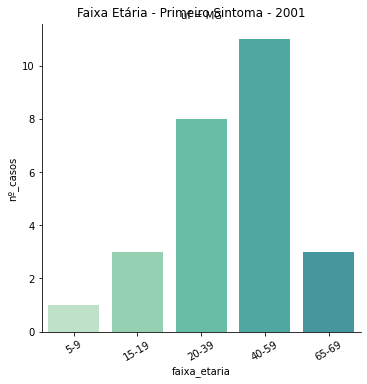

In [ ]:
ax = sns.catplot(data = primeiro_sintoma_faixa_etaria_2001_hipotese_2, x = 'faixa_etaria', y = 'nº_casos', kind = 'bar', col = 'uf', palette = sns.color_palette('mako_r', 13))
ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Faixa Etária - Primeiro Sintoma - 2001')

Text(0.5, 0.98, 'Faixa Etária - Primeiro Sintoma - 2003')

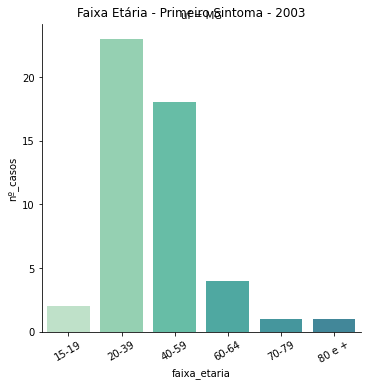

In [ ]:
ax = sns.catplot(data = primeiro_sintoma_faixa_etaria_2003_hipotese_2, x = 'faixa_etaria', y = 'nº_casos', kind = 'bar', col = 'uf', palette = sns.color_palette('mako_r', 13))
ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Faixa Etária - Primeiro Sintoma - 2003')

Text(0.5, 0.98, 'Faixa Etária - Primeiro Sintoma - 2019')

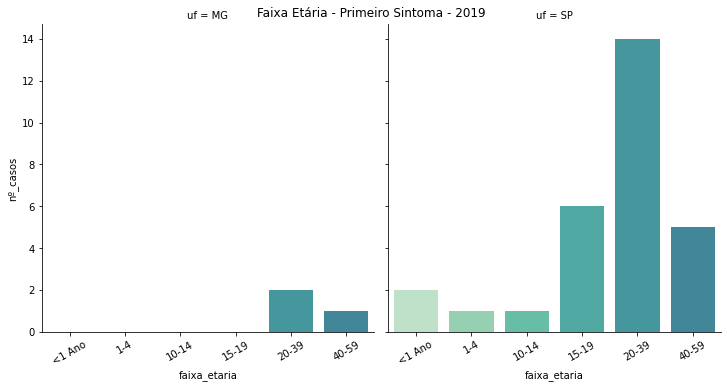

In [ ]:
ax = sns.catplot(data = primeiro_sintoma_faixa_etaria_2009_hipotese_2, x = 'faixa_etaria', y = 'nº_casos', kind = 'bar', col = 'uf', palette = sns.color_palette('mako_r', 13))
ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Faixa Etária - Primeiro Sintoma - 2019')

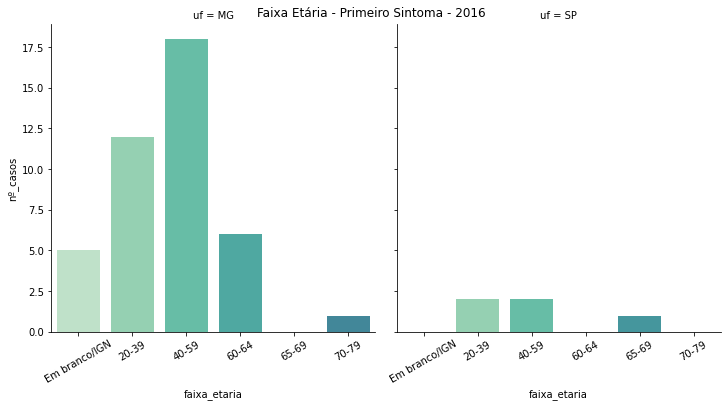

In [ ]:
ax = sns.catplot(data = primeiro_sintoma_faixa_etaria_2016_hipotese_2, x = 'faixa_etaria', y = 'nº_casos', kind = 'bar', col = 'uf', palette = sns.color_palette('mako_r', 13))
ax.fig.suptitle('Faixa Etária - Primeiro Sintoma - 2016')
ax.set_xticklabels(rotation=30)

## 5. Conclusão

Após todas as análises e hipóteses exploradas, acredito que o maior problema das nossas ações contra a Febre Amarela seja o descaso com a doença. Mesma o estado de Minas Gerais melhorando a efetividade das vacinações e passando de números pequenos para 100% da taxa de vacinação em 2005, ainda vamos enfrentar um problema histórico antigo de pessoas que podem não estar vacinadas contra o vírus amarilico.

Como o público alvo da vacina são crianças com menos de 1 ano de idade, acredito que é dificil nos basearmos nesse número para saber a efetividade da campanha de vacinação.

As faixas etárias de contágios dos picos vistos no estado de São Paulo e Rio de Janeiro nos anos de 2001, 2003, 2009 e 2016 começam em pessoas com idade maior de 20 anos, ou seja, pra validar teriamos que analisar a base 1981, e conforme dados históricos de ambos os estados, é muito dificil de acreditar que nesses anos nós eramos mais efetivos nas vacinações.

Os picos de óbitos dos anos de 2017 e 2018 nos estados de Minas Gerais e São Paulo caracterizam-se em pessoas acima de 30 anos, já em SP não temos concentração expressiva em qualquer faixa.

Esse estudo consegue reforçar o quanto a campanha de vacinação de 1998 foi importante para o aumento da imunização da população, conseguimos evidenciar que no número de pessoas contaminadas e em quantidade de pessoas mortas as faixas de idades antes de 20 anos não possuem números expressivos.

Graças ao estudo da Secretaria de Vigilancia de Saúde conseguimos verificar que os estados do Pará, Maranhão e Goiás reduziram drasticamente o número de casos.

Outro fator que conseguimos analisar neste estudo é que desde 2003 a Secretaria de Vigilancia de Saúde classifica as áreas de São Paulo e Minas como áreas críticas, e os picos da doença se manifestaram nesses locais em 2017 e 2018, será que devemos aplicar mais pressão para as pessoas se concentizarem com este problema fatal?

## 6. Referências

Gostaria de agradecer ao colega João Vítor Perez de Souza, o trabalho dele foi fantástico e inspirador.

Reportagem - https://saude.abril.com.br/medicina/o-que-e-a-febre-amarela/#:~:text=SA%C3%9ADE%20%C3%A9%20Vital-,O%20que%20%C3%A9%20a%20febre%20amarela%3F,da%C3%AD%20a%20import%C3%A2ncia%20da%20vacina.
Policlinica de Botafogo - http://www.policlinicadebotafogo.com.br/o-que-voce-precisa-saber-sobre-a-febre-amarela/#:~:text=Qual%20%C3%A9%20a%20taxa%20de,ficou%20em%20cerca%20de%2030%25.
Biblioteca Virtual em Saúde MS - https://bvsms.saude.gov.br/bvs/publicacoes/0110historia_febre.pdf
Biblioteca Virtual em Saúde MS - https://bvsms.saude.gov.br/bvs/publicacoes/manual_vigilancia_epid_febre_amarela.pdf